Classes: [1 2 3 4]
Epoch 1/120


c:\Users\Gustavo Nakamura\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4470 - loss: 1.5633 - val_accuracy: 0.5429 - val_loss: 0.9320
Epoch 2/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.5710 - loss: 0.9662 - val_accuracy: 0.5429 - val_loss: 1.4664
Epoch 3/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.6199 - loss: 0.8494 - val_accuracy: 0.6571 - val_loss: 0.7614
Epoch 4/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.6823 - loss: 0.7322 - val_accuracy: 0.6762 - val_loss: 0.8597
Epoch 5/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.6867 - loss: 0.6987 - val_accuracy: 0.4667 - val_loss: 1.8124
Epoch 6/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.6823 - loss: 0.7399 - val_accuracy: 0.7429 - val_loss: 0.5765
Epoch 7/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.6943 - loss: 0.6721 - val_accuracy: 0.6286 - val_loss: 1.0962
Epoch 8/120
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.6742 - loss: 0.7403 - val_accuracy: 0.6857 -

c:\Users\Gustavo Nakamura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo Nakamura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo Nakamura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

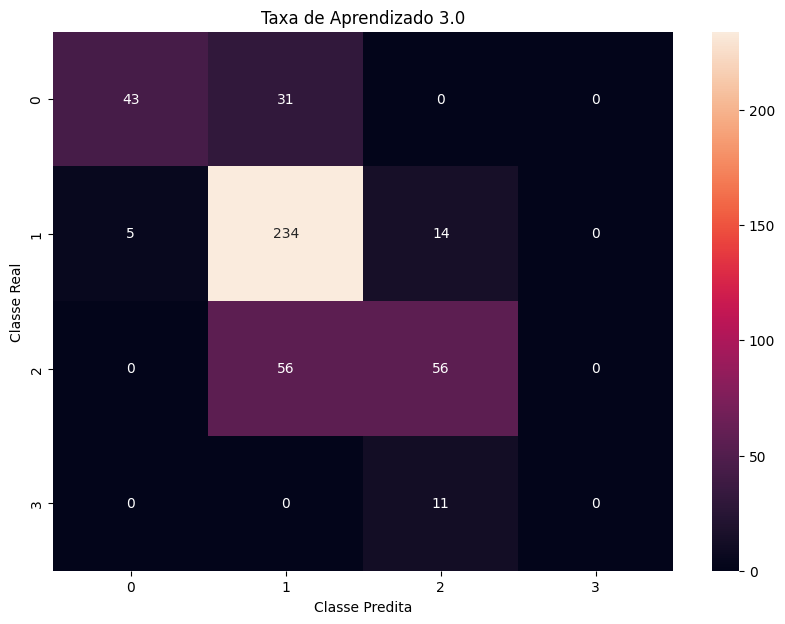

In [27]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

#https://www.overleaf.com/project/673d4b892dfe0351de164881

from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Path dos dados do exercício - com e sem label - classe
path = '../../Dados/treino_sinais_vitais_com_label.txt'

df = pd.read_csv(path, sep=',', header=None)
#Mapeamento dos dados das colunas
df.columns = ['id', 'pSist', 'pDiast', 'qPA', 'pulso', 'resp', 'gravidade', 'classe']

# Remove desnecessárias - n uteis para o treinamento
df = df.drop(['id', 'pSist', 'pDiast', 'gravidade'], axis=1)

# Separar features e rótulos
classeDados = df['classe']
rawDados = df.drop('classe', axis=1)

# ----------------------------------------------

# Reclassificar os rótulos para que estejam no intervalo [0, 3]
label_encoder = LabelEncoder()
classeDados = label_encoder.fit_transform(classeDados)

print("Classes:", label_encoder.classes_)  # Verificar as classes reclassificadas

# ----------------------------------------------

# Dividir os dados de treino e teste com o test split
dadosTreino, dadosTeste, labelTreino, labelTeste = train_test_split(rawDados, classeDados, test_size=0.3, random_state=8)

# ----------------------------------------------

# Normalizar os dados
scaler = StandardScaler()
dadosTreino = scaler.fit_transform(dadosTreino)
dadosTeste = scaler.transform(dadosTeste)

# ----------------------------------------------

#print(dadosTeste)

# Criar o modelo
model = Sequential([
    tf.keras.layers.Dense(15, input_shape=(dadosTreino.shape[1],), activation='sigmoid'),
    #tf.keras.layers.Dense(15, input_shape=(dadosTreino.shape[1],), activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')  # 4 neurônios na camada de saída
])

# Compilar o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=3.0), metrics=['accuracy'])

# Treinar o modelo
history = model.fit(dadosTreino, labelTreino, epochs=120, batch_size=10, validation_split=0.1, shuffle=True)


# Fazer previsões
y_pred = model.predict(dadosTeste)
y_pred_classes = np.argmax(y_pred, axis=1)

# Avaliar o modelo
accuracy = accuracy_score(labelTeste, y_pred_classes)
print(f'Acurácia: {accuracy * 100:.2f}%')

print(classification_report(labelTeste, y_pred_classes))

tf.keras.utils.plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

y_pred_classes = np.argmax(model.predict(dadosTeste), axis=1)
cm = confusion_matrix(labelTeste, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Taxa de Aprendizado 3.0')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()